100%|██████████| 800/800 [17:45<00:00,  1.36s/it]

tensor(-284.4192)


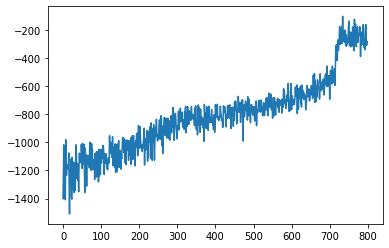

In [1]:
import torch.nn as nn
from seagul.rl.algos.ppo import ppo
from seagul.rl.algos.ppo_sym import ppo_sym
from seagul.rl.models import PPOModel
from seagul.nn import MLP, CategoricalMLP
import torch
import gym

import matplotlib.pyplot as plt
%matplotlib inline
import seagul.envs

torch.set_default_dtype(torch.double)
env_name= "Pendulum-v0"

input_size = 3
output_size = 1
layer_size = 12
num_layers = 2
activation = nn.ReLU

policy = MLP(input_size, output_size, num_layers, layer_size, activation)
value_fn = MLP(input_size, 1, num_layers, layer_size, activation)
model = PPOModel(policy, value_fn, action_var=.7, discrete=False)

# env2, t_policy, t_val, rewards = ppo('InvertedPendulum-v2', 100, policy, value_fn)
t_model, rewards, var_dict = ppo_sym(env_name, 
                                800, 
                                model, 
                                action_var_schedule = [.5],
                                env_timesteps = 200,
                                epoch_batch_size=1024,
                                gamma=0.99,
                                lam=0.99,
                                eps=0.2,
                                seed=0,
                                policy_batch_size=512,
                                value_batch_size=512,
                                policy_lr=1e-4,
                                value_lr=1e-3,
                                p_epochs=10,
                                v_epochs=10,
                                use_gpu=False,
                                reward_stop=None)
#print(rewards)
plt.plot(rewards)

locals().update(var_dict)

In [1]:
import torch.nn as nn
from seagul.rl.algos.ppo2 import ppo
from seagul.rl.models import PPOModel
from seagul.nn import MLP, CategoricalMLP
import torch
import gym


import matplotlib.pyplot as plt
%matplotlib inline
import seagul.envs

torch.set_default_dtype(torch.double)
env_name= "Pendulum-v0"

input_size = 3
output_size = 1
layer_size = 12
num_layers = 2
activation = nn.ReLU

policy = MLP(input_size, output_size, num_layers, layer_size, activation)
value_fn = MLP(input_size, 1, num_layers, layer_size, activation)
model = PPOModel(policy, value_fn, action_var=.7, discrete=False)

# env2, t_policy, t_val, rewards = ppo('InvertedPendulum-v2', 100, policy, value_fn)
t_model, rewards, var_dict = ppo(env_name, 
                                6e5, 
                                model, 
                                act_var_schedule = [.7],
                                epoch_batch_size=512,
                                gamma=0.99,
                                lam=0.99,
                                eps=0.2,
                                seed=0,
                                policy_batch_size=512,
                                value_batch_size=512,
                                policy_lr=1e-4,
                                value_lr=1e-3,
                                p_epochs=32,
                                v_epochs=32,
                                use_gpu=False,
                                reward_stop=None)
print(rewards[-1])
plt.plot(rewards)

locals().update(var_dict)


 22%|██▏       | 130200/600000.0 [03:37<13:02, 600.13it/s]

KeyboardInterrupt: 

In [ ]:
env = gym.make(env_name)

done = False
obs = env.reset()

obs_list = []
act_list = []
rew_list = []
avg_list = []
val_list = []

while not done:
    act, val, _ ,_ = model.step(obs)
    obs,rew,done,_ = env.step(act.reshape(-1))
    avg = model.policy(torch.as_tensor(obs))
    
    obs_list.append(obs)
    act_list.append(act)
    rew_list.append(rew)
    avg_list.append(avg)
    val_list.append(val)
    
plt.plot(obs_list)
plt.figure()
plt.plot(act_list)
plt.figure()
plt.plot(rew_list)
plt.figure()
plt.plot(val_list)
plt.figure()
plt.plot(avg_list)
    

In [ ]:
plt.plot(p_loss_hist)

In [ ]:
plt.plot(v_loss_hist)